In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
sample_submission = pd.read_csv('sample_submission (3).csv')
df_train = pd.read_csv('train.csv (2).zip')
df_test = pd.read_csv('train.csv (2).zip')


In [3]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(df_test.shape, df_train.shape)

(42000, 785) (42000, 785)


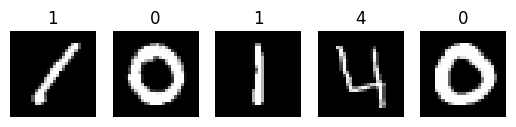

In [7]:
fig, axes = plt.subplots(1, 5)
for i, ax in enumerate(axes):
    ax.imshow(df_train.iloc[i, 1:].to_numpy().reshape(28, 28), cmap='gray')
    ax.set_title(df_train.iloc[i, 0])
    ax.axis('off')
plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical  # One-hot encode

X = df_train.drop('label', axis=1).to_numpy()
y = df_train['label'].to_numpy()

# Normalize the pixel values  [0, 255] -> [0, 1]
X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)

In [9]:
print(y[:10])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons.
])

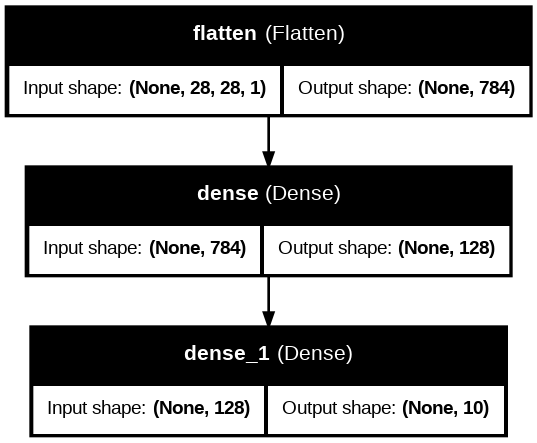

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.5271 - val_accuracy: 0.9468 - val_loss: 0.1941
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9550 - loss: 0.1547 - val_accuracy: 0.9565 - val_loss: 0.1480
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9710 - loss: 0.0975 - val_accuracy: 0.9611 - val_loss: 0.1259
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9802 - loss: 0.0682 - val_accuracy: 0.9677 - val_loss: 0.1060
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0539 - val_accuracy: 0.9681 - val_loss: 0.1064
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9873 - loss: 0.0425 - val_accuracy: 0.9695 - val_loss: 0.1043
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9918 - loss: 0.0302 - val_accuracy: 0.9727 - val_loss: 0.0944
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9942 - loss: 0.0237 - 

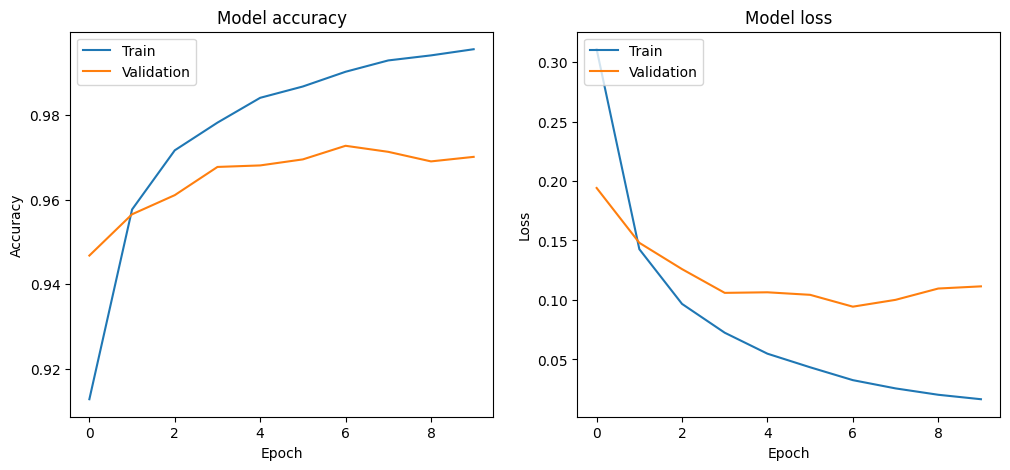

In [15]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

history_plot(history)

In [16]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer with the specified shape
    Flatten(),                  # Flatten the input
    Dense(256, activation='relu'),      # First hidden layer with 256 neurons
    Dense(128, activation='relu'),      # Second hidden layer with 128 neurons
    Dense(64, activation='relu'),       # Third hidden layer with 64 neurons
    Dense(10, activation='softmax')     # Output layer with 10 neurons
])
model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8646 - loss: 0.4692 - val_accuracy: 0.9552 - val_loss: 0.1493
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9644 - loss: 0.1163 - val_accuracy: 0.9687 - val_loss: 0.1030
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9766 - loss: 0.0758 - val_accuracy: 0.9683 - val_loss: 0.1068
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0488 - val_accuracy: 0.9643 - val_loss: 0.1277
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9846 - loss: 0.0437 - val_accuracy: 0.9710 - val_loss: 0.1057
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9717 - val_loss: 0.1020
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9903 - loss: 0.0282 - val_accuracy: 0.9726 - val_loss: 0.1101
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9935 - loss: 0.0220 

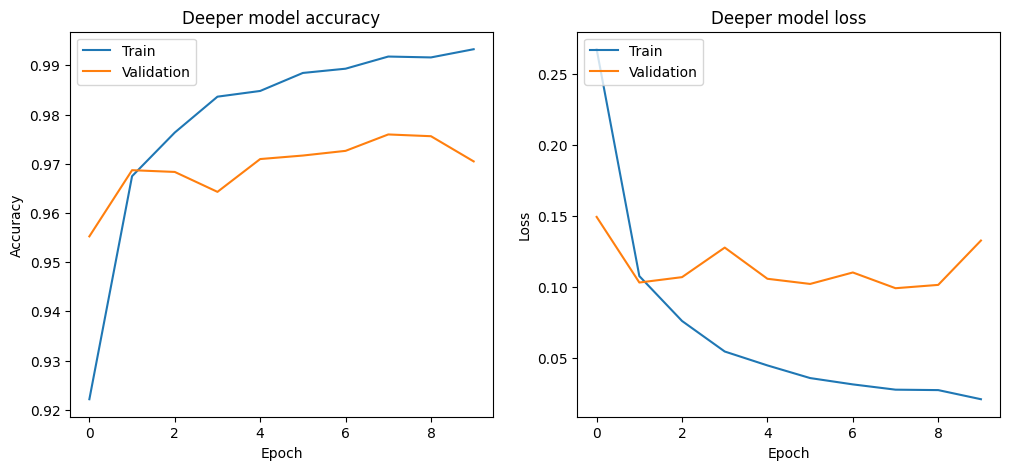

In [17]:
history_plot(history_deep, model_name='Deeper model')

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')
    ])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


history_conv = model_conv.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=10,
                              batch_size=32)                                            # Output layer

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.8801 - loss: 0.3951 - val_accuracy: 0.9764 - val_loss: 0.0735
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.9825 - loss: 0.0562 - val_accuracy: 0.9842 - val_loss: 0.0494
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9879 - loss: 0.0369 - val_accuracy: 0.9842 - val_loss: 0.0459
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9842 - val_loss: 0.0520
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9860 - val_loss: 0.0516
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9945 - loss: 0.0165 - val_accuracy: 0.9896 - val_loss: 0.0353
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9869 - val_loss: 0.0450
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9974 -

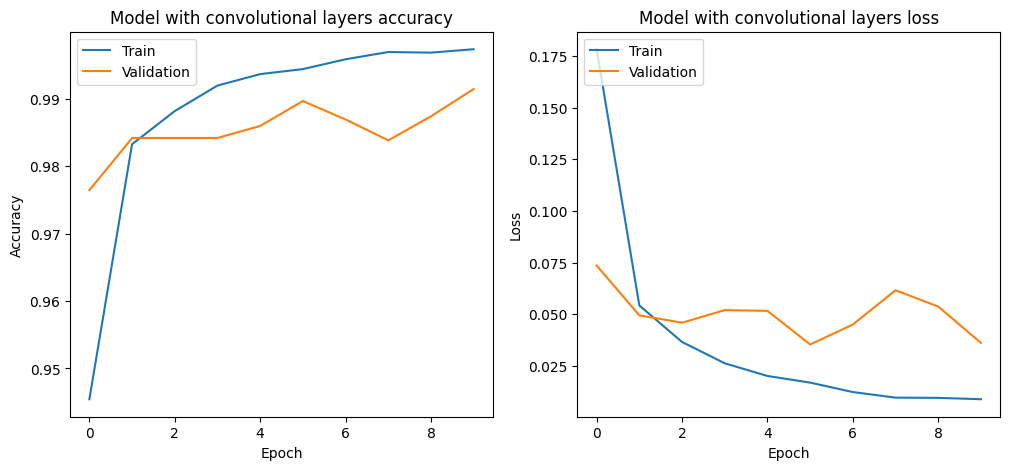

In [20]:
history_plot(history_conv, model_name='Model with convolutional layers')

In [21]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),
    # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                                    validation_data=(X_train, y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.7890 - loss: 0.6398 - val_accuracy: 0.9787 - val_loss: 0.0729
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.9616 - loss: 0.1253 - val_accuracy: 0.9865 - val_loss: 0.0432
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.9737 - loss: 0.0906 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9768 - loss: 0.0753 - val_accuracy: 0.9917 - val_loss: 0.0261
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9798 - loss: 0.0659 - val_accuracy: 0.9931 - val_loss: 0.0213
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.9943 - val_loss: 0.0186
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9954 - val_loss: 0.0142
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9840 -

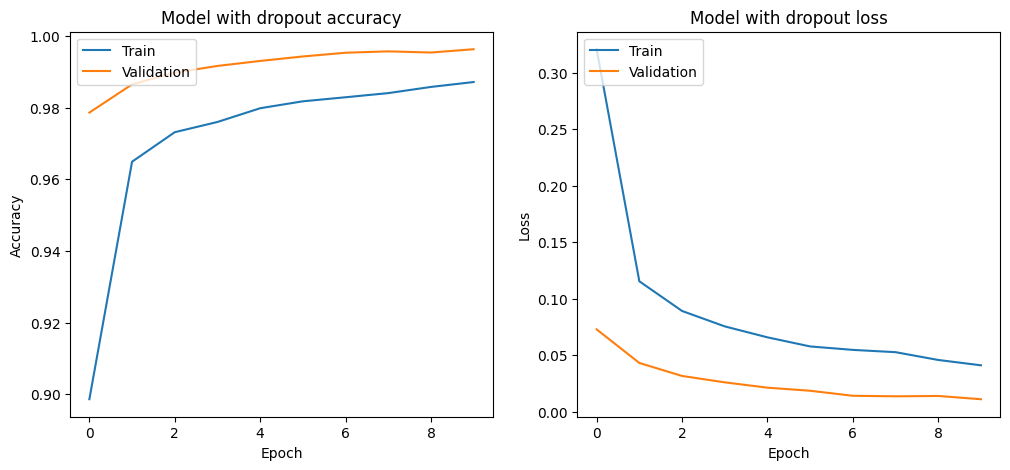

In [22]:
history_plot(history_dropout, model_name='Model with dropout')

In [24]:
!pip install keras_tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Define the model creation function
def build_model(hp):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Conv2D(filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Flatten(),
        Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'),
        Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.1 MB/s eta 0:00:00


In [29]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop if no improvement after 3 epochs
    restore_best_weights=True
)

# Create the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Reduce number of trials for quicker testing
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Start the search
tuner.search(
    X_train, y_train,
    epochs=5,  # Reduce epochs for quicker iterations
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  # Add the callback
    verbose=1  # Enable progress output
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Display the best hyperparameters
print(f"Best hyperparameters: {best_hps}")


Trial 4 Complete [00h 15m 33s]
val_accuracy: 0.9910714030265808

Best val_accuracy So Far: 0.9927380681037903
Total elapsed time: 01h 27m 43s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x78603ea5b160>


In [ ]:
history_best = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8689 - loss: 0.4149 - val_accuracy: 0.9814 - val_loss: 0.0578
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 88s 82ms/step - accuracy: 0.9779 - loss: 0.0691 - val_accuracy: 0.9864 - val_loss: 0.0418
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 134s 75ms/step - accuracy: 0.9852 - loss: 0.0442 - val_accuracy: 0.9894 - val_loss: 0.0358
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9874 - loss: 0.0369 - val_accuracy: 0.9887 - val_loss: 0.0332
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 88s 82ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9893 - val_loss: 0.0329
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 133s 74ms/step - accuracy: 0.9918 - loss: 0.0239 - val_accuracy: 0.9879 - val_loss: 0.0356
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9883 - val_loss: 0.0363
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 85s 77ms/step - accuracy: 0.9938

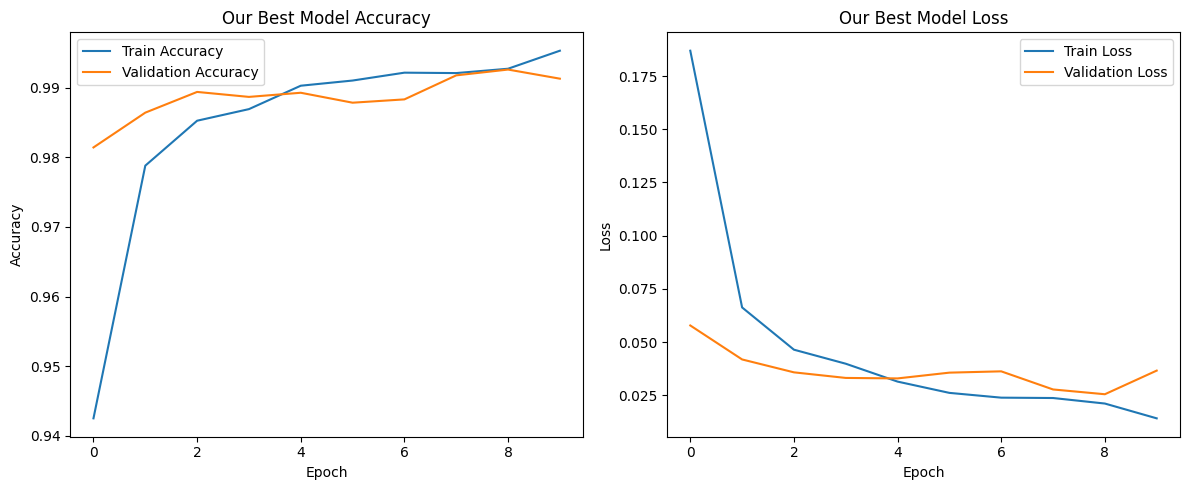

In [32]:
# Train the best model
history_best = best_model.fit(
    X_train, y_train,
    epochs=10,  # You can adjust this
    validation_data=(X_val, y_val),
    verbose=1
)

# Plot the training history
def history_plot(history, model_name='Model'):
    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
history_plot(history_best, model_name='Our Best Model')


In [33]:
y_val_pred = best_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [34]:
test_loss, test_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.03660215437412262
Test Accuracy: 0.9913095235824585


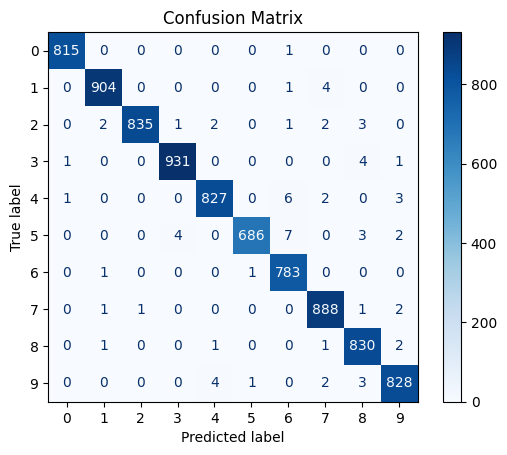

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [37]:
X_test = df_test.drop('label', axis=1).values # Drop the 'label' column (if it exists)

X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [38]:
y_final_pred = best_model.predict(X_test)
y_final_pred_classes = np.argmax(y_final_pred, axis=1)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step


In [39]:
list(sample_submission)

['ImageId', 'Label']

In [40]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(y_final_pred_classes) + 1),
    'Label': y_final_pred_classes
})

submission.to_csv('submission.csv', index=False)

print("Results have been saved to 'submission.csv'")

Results have been saved to 'submission.csv'
